In [1]:
from netCDF4 import Dataset
import iris
import numpy as np
import pylab as plt
import cartopy.crs as ccrs
import cartopy.feature
filename = '/Users/ananth/Downloads/NESOSIM_2014_2015.nc'

In [52]:
cube = iris.load(filename)

lat_index = 0
lon_index = 0
snowdepth_index = 0
for i in range(7):
    varname = cube[i].var_name
    if varname == 'latitude':
        lat_index = i
    elif varname == 'longitude':
        lon_index = i
    elif varname == 'snowDepth':
        snowdepth_index = i
        
lon = cube[lon_index].data
lat = cube[lat_index].data
snow_depth = cube[snowdepth_index][200,:,:].data


/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:645: UserWarning: Ignoring netCDF variable 'longitude' invalid units 'degrees East'
  warnings.warn(msg)
/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:645: UserWarning: Ignoring netCDF variable 'latitude' invalid units 'degrees North'
  warnings.warn(msg)


In [56]:
snow_depth_2 = cube[snowdepth_index].data
print(np.max(snow_depth_2))

nan


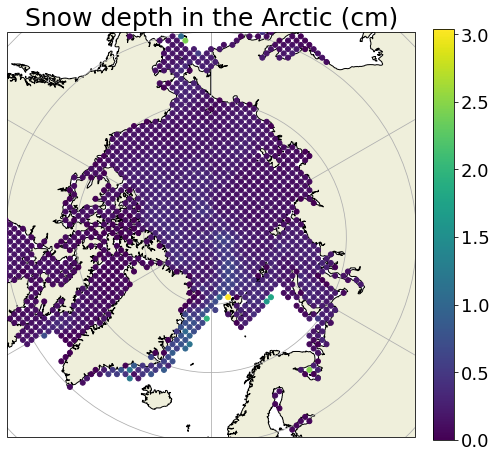

In [57]:
fig, ax = plt.subplots(1,1,figsize=(8,8),  subplot_kw={'projection': ccrs.NorthPolarStereo()})



ax.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())
ax.gridlines()

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
#ax.add_feature(cartopy.feature.OCEAN)

#for i in range(448):
 #   for j in range(304):
  #      ax.scatter(lat[i][j],lon[i][j],color = 'k',s=50,marker = 'x',transform=ccrs.PlateCarree(),zorder=5)

lat_1d = lat.flatten();
lon_1d = lon.flatten();

snowdepth_1d = snow_depth.flatten()

j = np.isnan(snowdepth_1d)
s_depth_slice = snowdepth_1d[~j]
lat_slice = lat_1d[~j]
lon_slice = lon_1d[~j]

colors = s_depth_slice/np.max(s_depth_slice)
colors = s_depth_slice

im = ax.scatter(lon_slice, lat_slice,c = colors ,s = 100, marker = '.',transform = ccrs.PlateCarree(),zorder = 5)
cb = fig.colorbar(im,ax=ax,fraction=0.046, pad=0.04)

#ax.scatter(lat[])
#ax.colorbar()
ax.set_title('Snow depth in the Arctic (cm)',fontsize=25)
cb.ax.tick_params(labelsize=18)
#ax.legend(fontsize='x-large')

In [48]:
cube[0].coord('day').points

array([20140816, 20140817, 20140818, 20140819, 20140820, 20140821,
       20140822, 20140823, 20140824, 20140825, 20140826, 20140827,
       20140828, 20140829, 20140830, 20140831, 20140901, 20140902,
       20140903, 20140904, 20140905, 20140906, 20140907, 20140908,
       20140909, 20140910, 20140911, 20140912, 20140913, 20140914,
       20140915, 20140916, 20140917, 20140918, 20140919, 20140920,
       20140921, 20140922, 20140923, 20140924, 20140925, 20140926,
       20140927, 20140928, 20140929, 20140930, 20141001, 20141002,
       20141003, 20141004, 20141005, 20141006, 20141007, 20141008,
       20141009, 20141010, 20141011, 20141012, 20141013, 20141014,
       20141015, 20141016, 20141017, 20141018, 20141019, 20141020,
       20141021, 20141022, 20141023, 20141024, 20141025, 20141026,
       20141027, 20141028, 20141029, 20141030, 20141031, 20141101,
       20141102, 20141103, 20141104, 20141105, 20141106, 20141107,
       20141108, 20141109, 20141110, 20141111, 20141112, 20141

In [61]:
print(s_depth_slice)

[0.1151 0.1494 0.139  ... 0.1364 0.143  0.087 ]


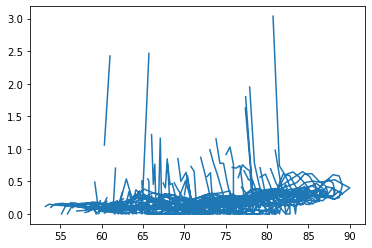

In [63]:
plt.plot(lat_slice,s_depth_slice)